In [16]:
from google.colab import drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El conjunto de datos tiene la siguiente informacion acerca de clientes de tarjetas de credito.

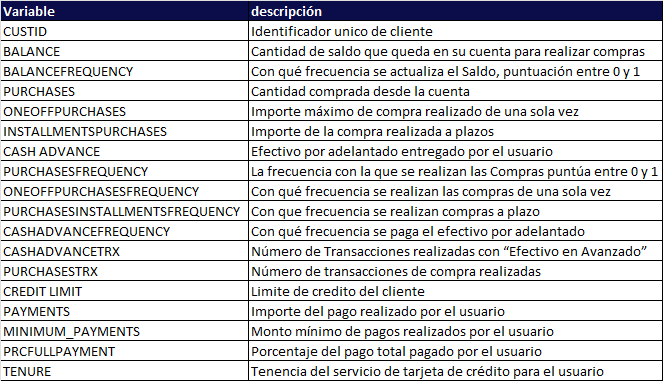


Datos sacados de https://www.kaggle.com/datasets/mahnazarjmand/customer-segmentation

In [19]:
df = pd.read_csv("/content/drive/MyDrive/Data science/Segmentacion Clientes clusterisacion/Customer_Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.9,0.8,95.4,0.0,95.4,0.0,0.2,0.0,0.1,0.0,0,2,"1,000.0",201.8,139.5,0.0,12
1,C10002,"3,202.5",0.9,0.0,0.0,0.0,"6,442.9",0.0,0.0,0.0,0.2,4,0,"7,000.0","4,103.0","1,072.3",0.2,12
2,C10003,"2,495.1",1.0,773.2,773.2,0.0,0.0,1.0,1.0,0.0,0.0,0,12,"7,500.0",622.1,627.3,0.0,12
3,C10004,"1,666.7",0.6,"1,499.0","1,499.0",0.0,205.8,0.1,0.1,0.0,0.1,1,1,"7,500.0",0.0,NaN,0.0,12
4,C10005,817.7,1.0,16.0,16.0,0.0,0.0,0.1,0.1,0.0,0.0,0,1,"1,200.0",678.3,244.8,0.0,12


In [20]:
pd.options.display.float_format='{:,.1f}'.format

In [21]:
df.shape

(8950, 18)

# Preparacion de datos

1. Integración de los datos
2. Eliminar variables irrelevantes y redundantes
3. Descripción estadística de los datos
4. Limpieza de datos atípicos
5. Limpieza de nulos
6. Division de datos
7. Escalamiento de datos

# 1. Integracion de datos

En este caso nuestros datos vienen de una sola base de datos por tal motivo solo nos aseguraremos de eliminar las variables repetidas si existen.

In [22]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (8950, 18)
Tamaño del set después de eliminar las filas repetidas: (8950, 18)


# 2. Eliminacion de variables inecesarias y redundantes.
* La variable CUSTID no es necesaria para nuestra analisis pero podriamos utilizarla al final por lo que la conservaremos.
* Revistaremos que todas nuestras variables tengan mas de un valor.

In [23]:
df.drop("CUST_ID",inplace=True,axis=1)

In [25]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# 3. Descripción estadística de los datos

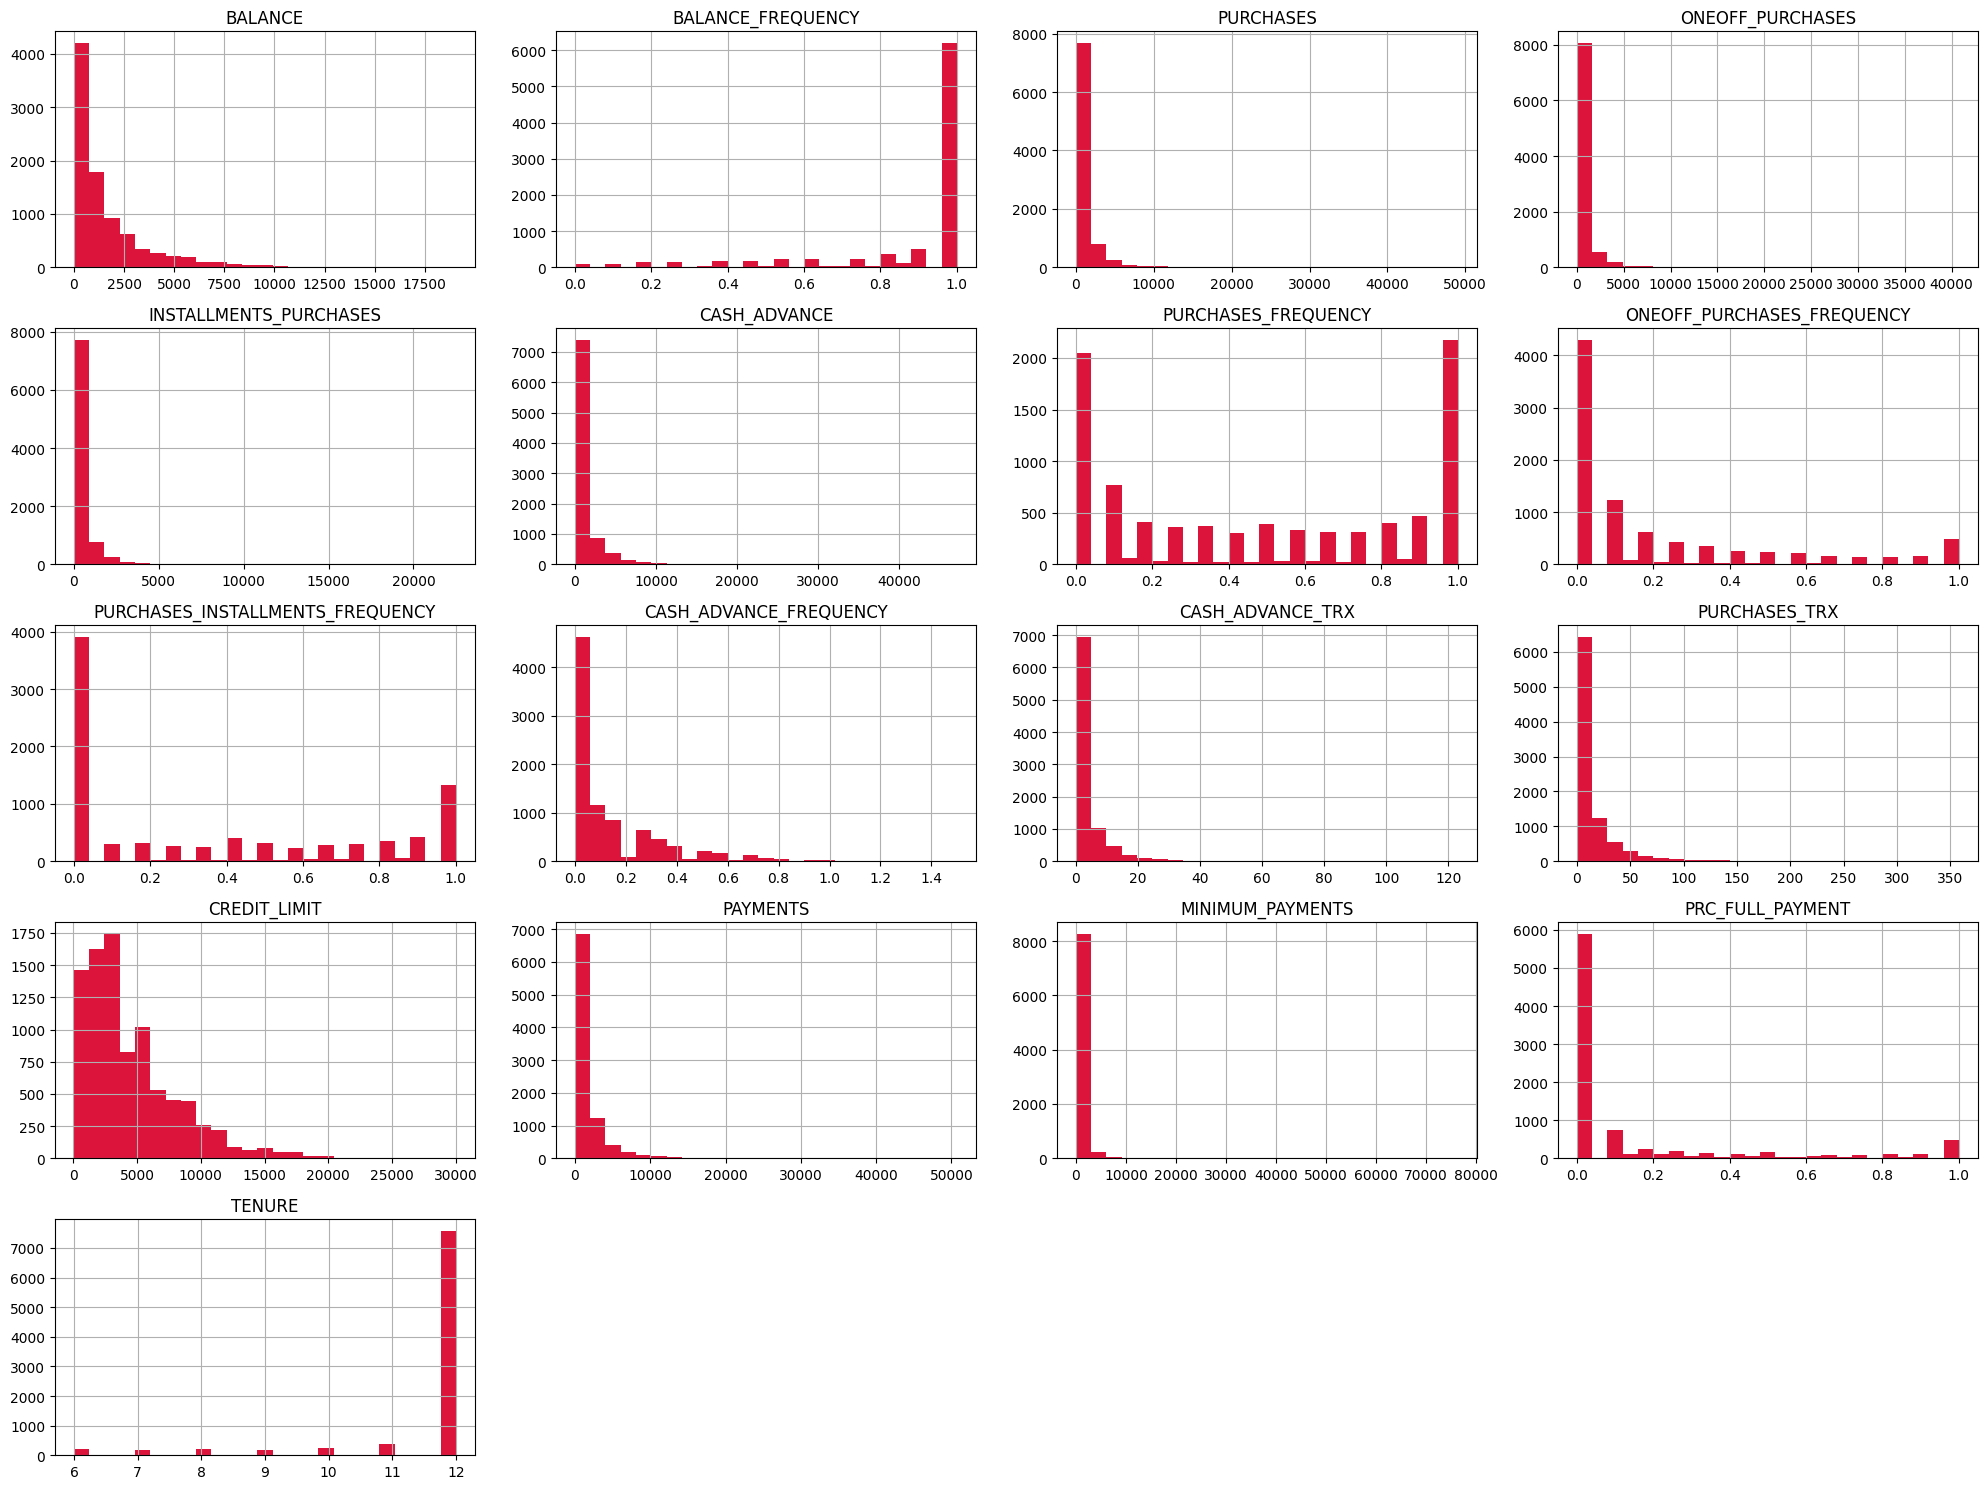

In [27]:
df.hist(bins=25 ,figsize=(20,15), color = 'crimson')

plt.tight_layout()
plt.show()

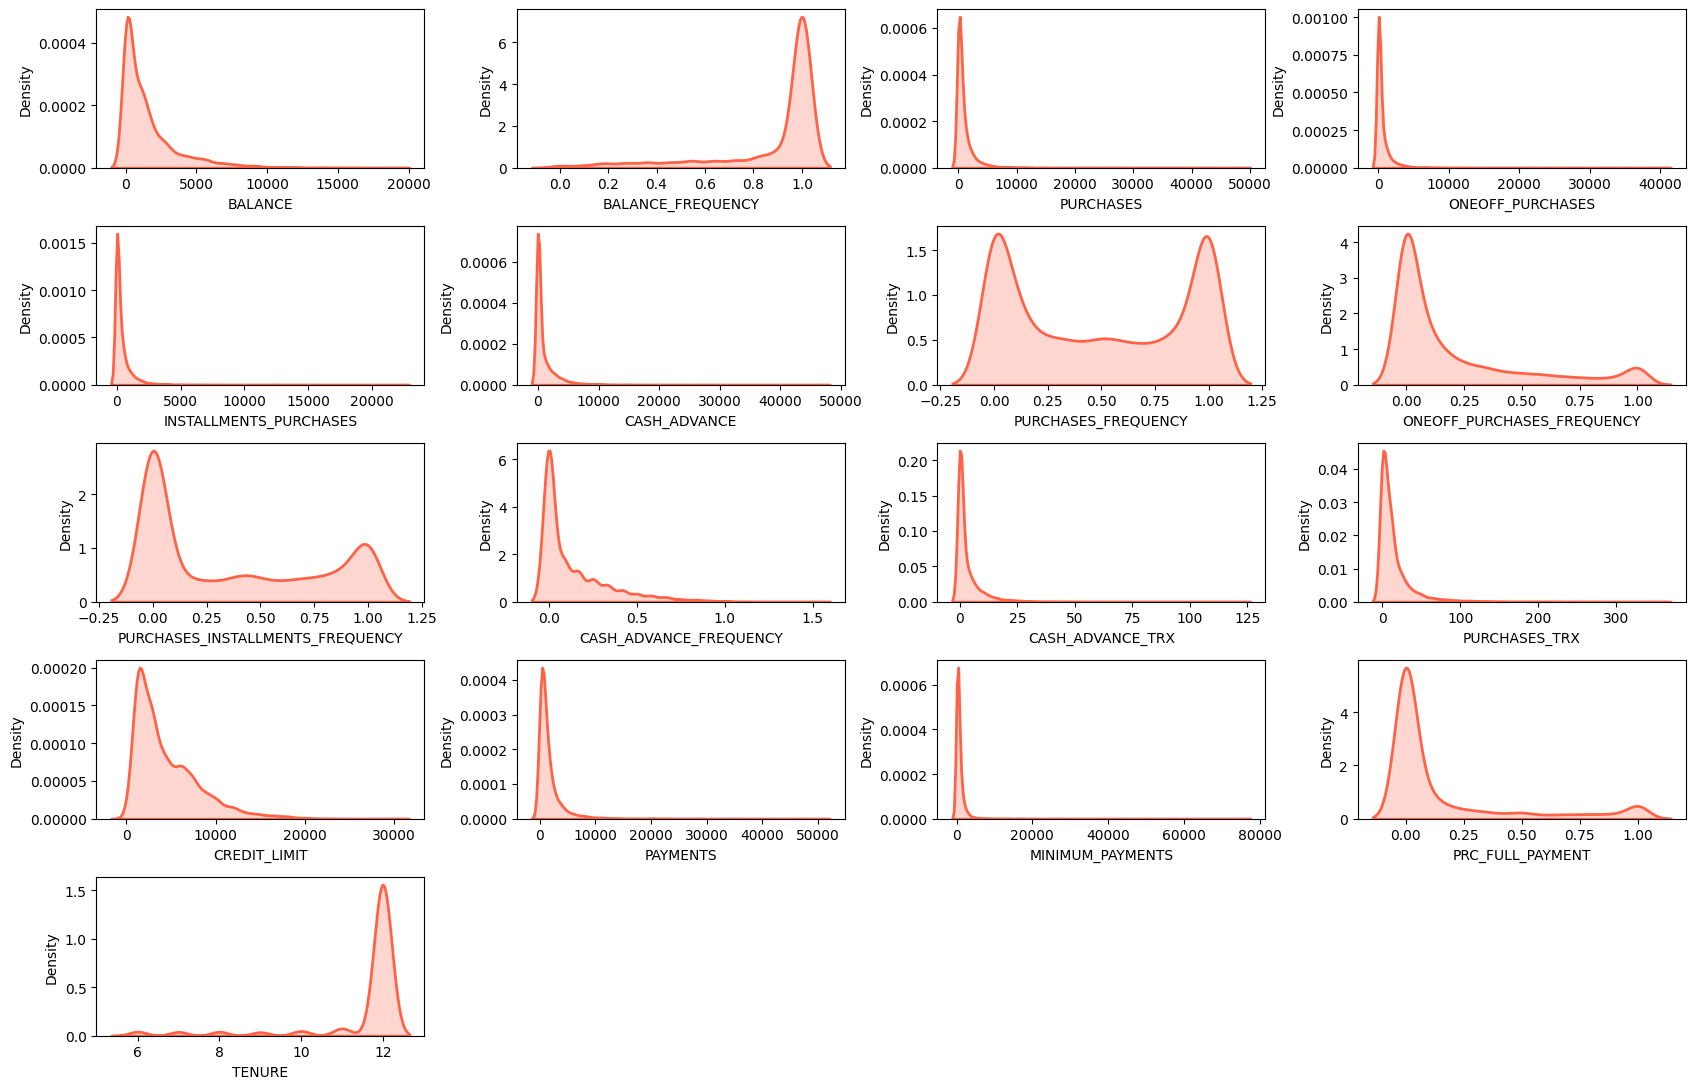

In [28]:
plt.figure(1 , figsize = (17 , 11))
n = 0
for x in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']:

    n += 1
    plt.subplot(5 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.kdeplot(x=df[x], data=df ,fill=True, linewidth=2, color='tomato')

plt.tight_layout()
plt.show()

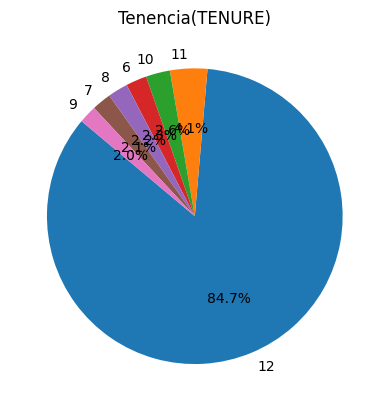

In [30]:
plt.pie(df.TENURE.value_counts(), labels=df.TENURE.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title("Tenencia (TENURE)")
plt.show()

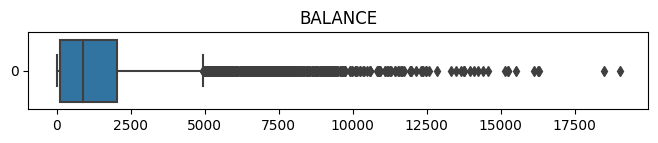

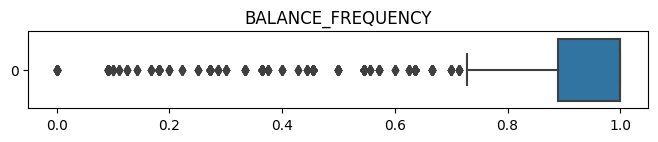

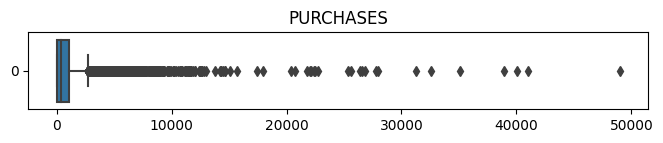

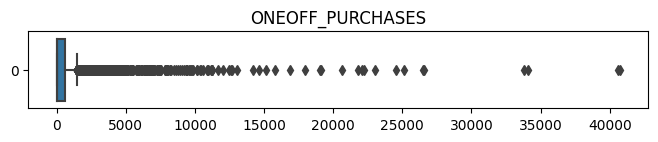

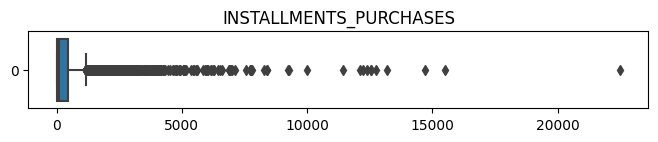

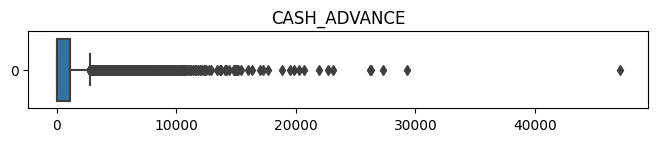

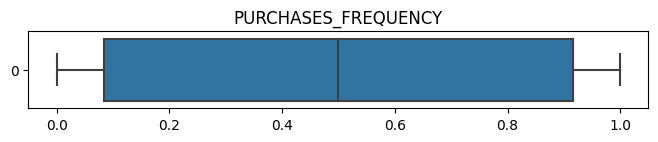

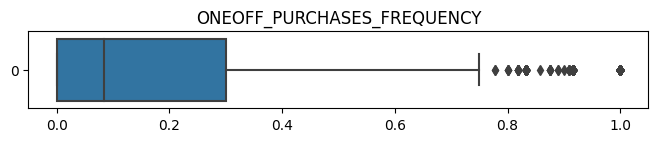

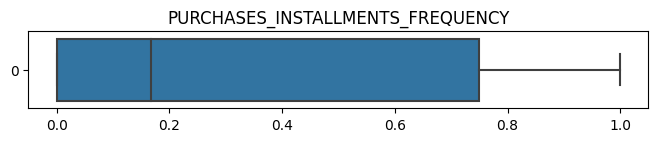

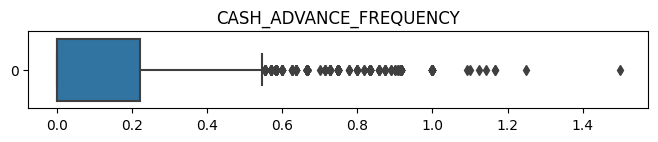

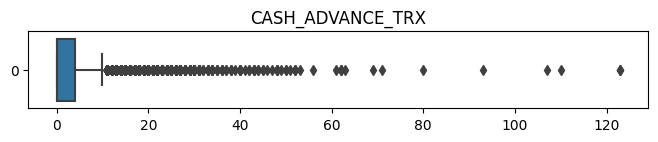

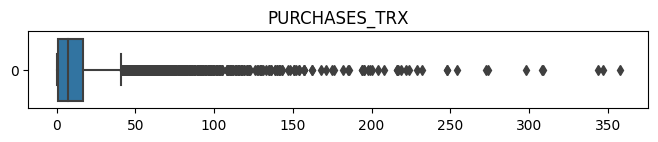

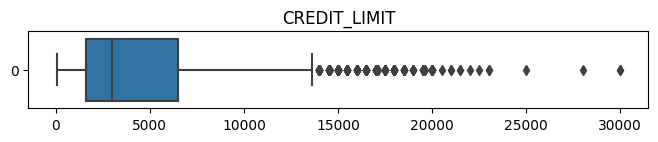

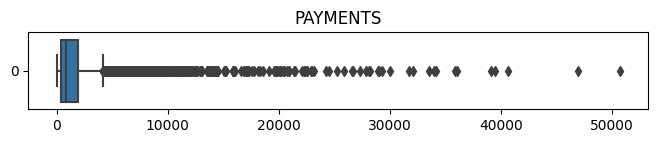

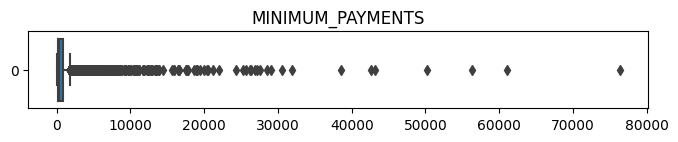

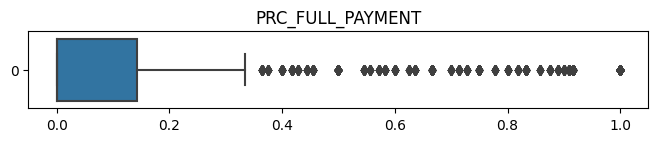

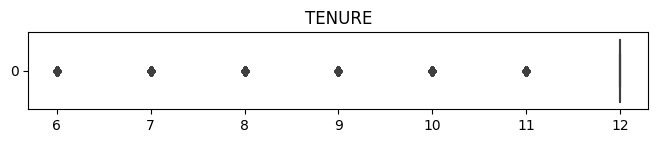

In [32]:
for i in range (len(df.columns)):
    fig= plt.subplots( figsize=(8,1))
    plt.subplot()
    ax=  sns.boxplot(df[df.columns[i]], orient='h')
    plt.title(df.columns[i])


# 5. Limpieza Nulos


In [33]:
df.isnull().sum() #Contamos datos nulos

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Encontramos un dato nulo que vamos a eliminar en la columna de Credit Limit y 313 datos nulos en la columna de pago minimo

In [34]:
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.4,0.2,0.0,0.0,0.0,186.9,0.0,0.0,0.0,0.2,1,0,NaN,9.0,14.4,0.0,6


In [35]:
df = df.drop(5203)

In [36]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()].head(10)

,PAYMENTS,MINIMUM_PAYMENTS
3,0.0,NaN
45,0.0,NaN
47,0.0,NaN
54,417.0,NaN
55,0.0,NaN
56,0.0,NaN
63,0.0,NaN
93,0.0,NaN
94,0.0,NaN
97,0.0,NaN


* Si el usuario no ha realizado ningun pago aun es logico que la cantidad minima sea igual a cero, por este motivo le asignaremos este valor.

* Los demas valores se cambiaran por la media de la columna "MINIMUM_PAYMENTS"



In [37]:
condicion = df.PAYMENTS == 0
df.loc[condicion, 'MINIMUM_PAYMENTS'] = 0


media_pago_minimo = np.mean(df.MINIMUM_PAYMENTS)
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(media_pago_minimo)

Nos aseguramos de no tener valores nulos

In [38]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [40]:
ruta = "/content/drive/MyDrive/Data science/Segmentacion Clientes clusterisacion/datos_limpios.csv"
df.to_csv(ruta,index=False)